In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import re             # regular expression library
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

In [2]:
pwd

'/Users/Robert/DSI/Capstone_3'

In [3]:
# Read datasets/papers.csv into papers
papers = pd.read_csv('nips-papers/papers.csv')

In [5]:
papers.head(3)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...


In [6]:
drop_cols = ['id', 'event_type', 'pdf_name']
papers.drop(columns=drop_cols, axis=1, inplace=True)

## Titles WordCloud

In [11]:
# Preprocess text
# Print the titles of the first rows 
print(papers['title'].tail(3))
print(papers['paper_text'][-3:])


7238            A Real Time Clustering CMOS Neural Engine
7239    Learning direction in global motion: two class...
7240    Correlation and Interpolation Networks for Rea...
Name: title, dtype: object
7238    A Real Time Clustering CMOS\nNeural Engine\nT....
7239    Learning direction in global motion: two\nclas...
7240    Correlation and Interpolation Networks for\nRe...
Name: paper_text, dtype: object


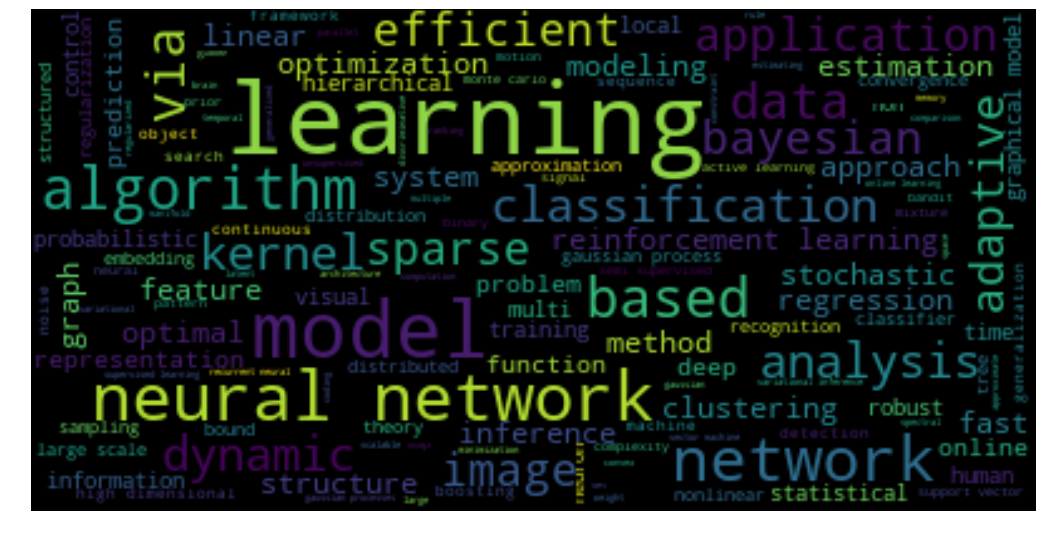

In [103]:
# For wordcloud
# Join the different processed titles together.
long_string = ' '.join(papers.title_processed)

# Create a WordCloud object
wordcloud = WordCloud()

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(long_string)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('images/word_cloud_titles')
#wordcloud.to_file("images/word_cloud_titles")
plt.show()

# Build a wordclouds of the text for each time period

In [95]:
#Function to build long string of paper text plus abstract, if present
def realdata(papertexts):
    s = ""
    for i in range(len(papertexts)):
        w_list = papertexts[i].split()
        indexvalue= w_list.index("abstract")+1 if "abstract" in w_list else 0
        s = s+ " ".join( w_list[indexvalue: ] )
    return s

In [96]:
# Make dataframe for each half decade 1987 - 2017
papers_thru_1990 = papers[papers.year <= 1990]
papers_thru_1990.reset_index(inplace=True)

papers_thru_1995 = papers[(papers.year > 1990) & (papers.year <= 1995)]
papers_thru_1995.reset_index(inplace=True)

papers_thru_2000 = papers[(papers.year > 1995) & (papers.year <= 2000)]
papers_thru_2000.reset_index(inplace=True)

papers_thru_2005 = papers[(papers.year > 2000) & (papers.year <= 2005)]
papers_thru_2005.reset_index(inplace=True)

papers_thru_2010 = papers[(papers.year > 2005) & (papers.year <= 2010)]
papers_thru_2010.reset_index(inplace=True)

papers_thru_2015 = papers[(papers.year > 2010) & (papers.year <= 2015)]
papers_thru_2015.reset_index(inplace=True)

papers_thru_2017 = papers[(papers.year > 2015) & (papers.year <= 2017)]
papers_thru_2017.reset_index(inplace=True)


In [97]:
papertext = papers_thru_1990['paper_text'].str.lower()
completestring_90 = realdata(papertext)
len(completestring_90)

7676960

In [98]:
papertext = papers_thru_1995['paper_text'].str.lower()
completestring_95 = realdata(papertext)
len(completestring_95)

13343853

In [99]:
papertext = papers_thru_2000['paper_text'].str.lower()
completestring_00 = realdata(papertext)
len(completestring_00)

14651914

In [100]:
papertext = papers_thru_2005['paper_text'].str.lower()
completestring_05 = realdata(papertext)
len(completestring_05)

24020780

In [101]:
papertext = papers_thru_2010['paper_text'].str.lower()
completestring_10 = realdata(papertext)
len(completestring_10)

36972386

In [129]:
papertext = papers_thru_2015['paper_text'].str.lower()
completestring_15 = realdata(papertext)
len(completestring_15)

60865341

In [102]:
papertext = papers_thru_2017['paper_text'].str.lower()
completestring_17 = realdata(papertext)
len(completestring_17)

44342791

In [103]:
#Iteritively added stopwords to exclude the "uninteresting"

stopwords = STOPWORDS
STOPWORDS.update(["this", "that", "thus", "from", "does", "example", "however", "since", "given", 
                    "et", "al", "hence", "therefore", "use", "used", "note", "corresponding", 
                    "setting", "well", "one", "form", "using", "second", "even", "known", "either",
                    "consider", "particular", "general", "represent", "case", "output", "defined",
                    "rather", "though", "although", "set", "problem", "function", "figure", "given",
                    "results", "number", "time", "data", "results", "given", "information", "different",
                    "models", "method", "n", "j", "r", "l", "mj", "a", "cj", "zero", "iv", "is", "elsewhere",
                    "large", "may", "finally", "c", "describing", "l", "cells", "single", "field",
                    "approximation", "activity", "mean", "input", "x", "f", "here", "y", "means", "make", "say",
                    "that", "then", "good", "clarify", "b", "t", "layers", "s", "e", "units", "input", "h", 
                    "z", "p", "xt", "items", "player", "two", "item", "let", "d", "w", "ti", "m", "g", "local",
                    "q", "actions", "users", "system", "regret", "user", "xi", "rule",
                    "eq", "kl", "em", "v", "u", "first", "entries", "optimal", "error", "o", "result",
                    "see", "section", "update", "theorem", "variables", "rl", "st", "size", "based", "fig", "source",
                    "sources", "step", "o", "xi", "vi", "approach", "yt", ])

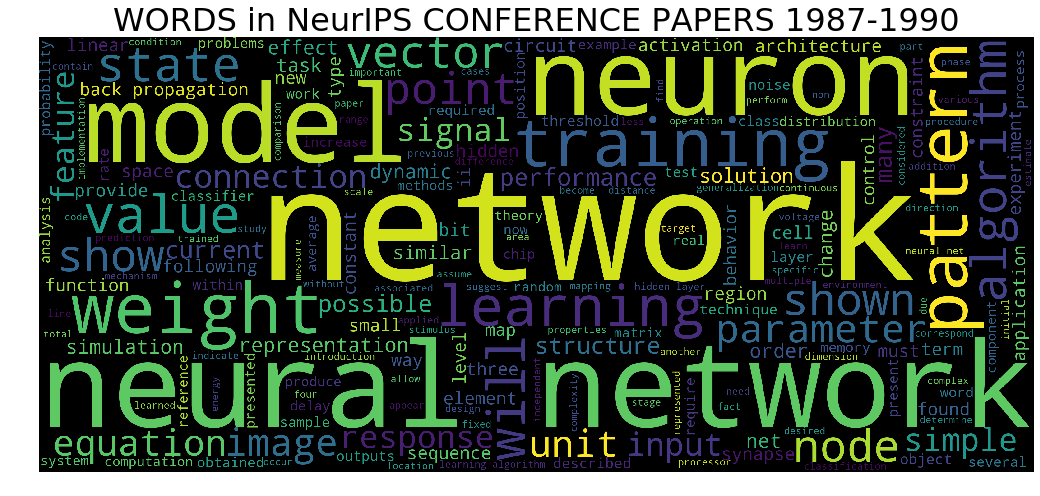

In [121]:
# Wordcloud thru 1990
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_90)
plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 1987-1990", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_1990');

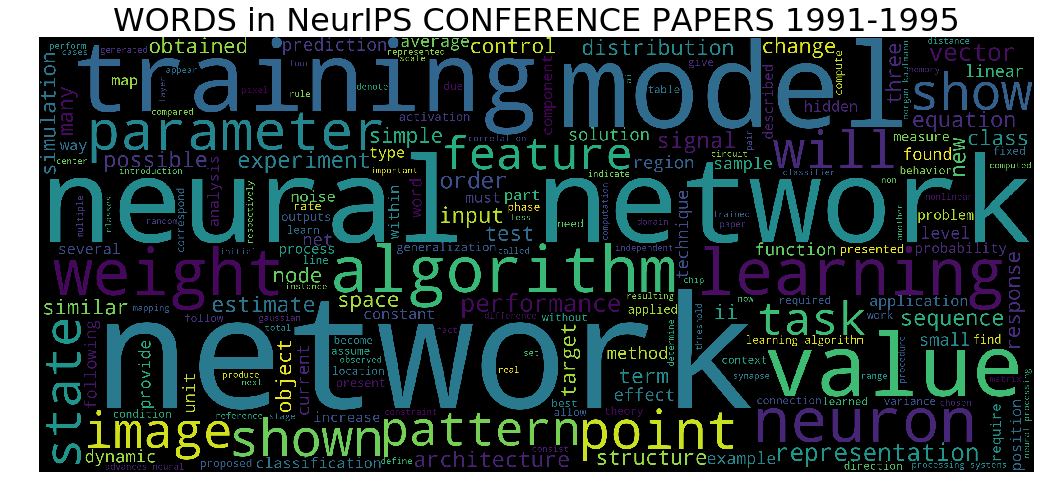

In [122]:
# Wordcloud thru 1995
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_95)

plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 1991-1995", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_1995');


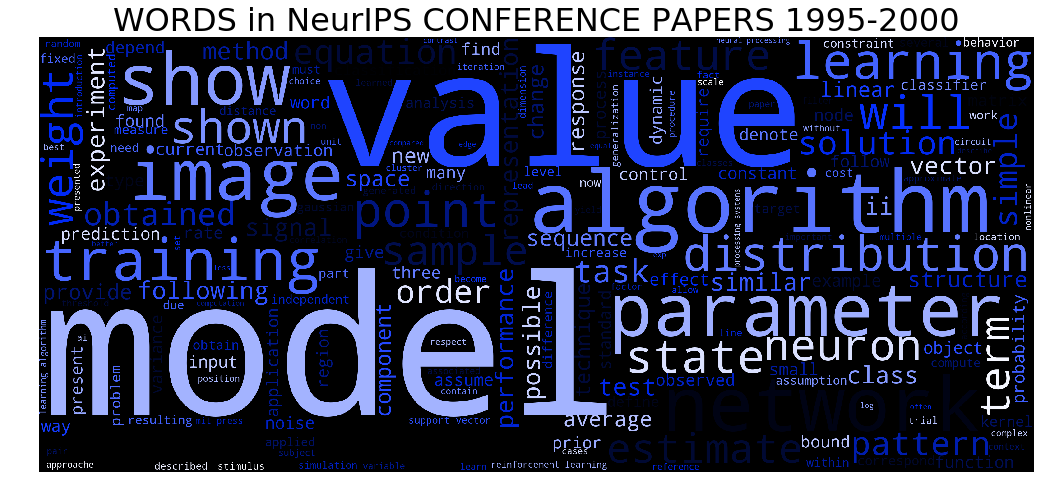

In [123]:
# Wordcloud thru 2000
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_00)

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 1995-2000", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_2000');


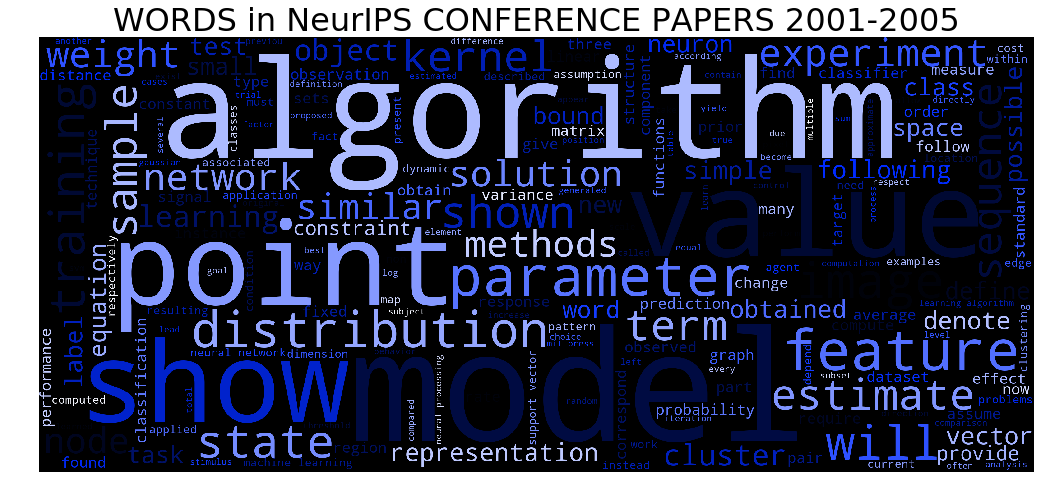

In [125]:
# Wordcloud thru 2005
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_05)

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 2001-2005", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_2005');


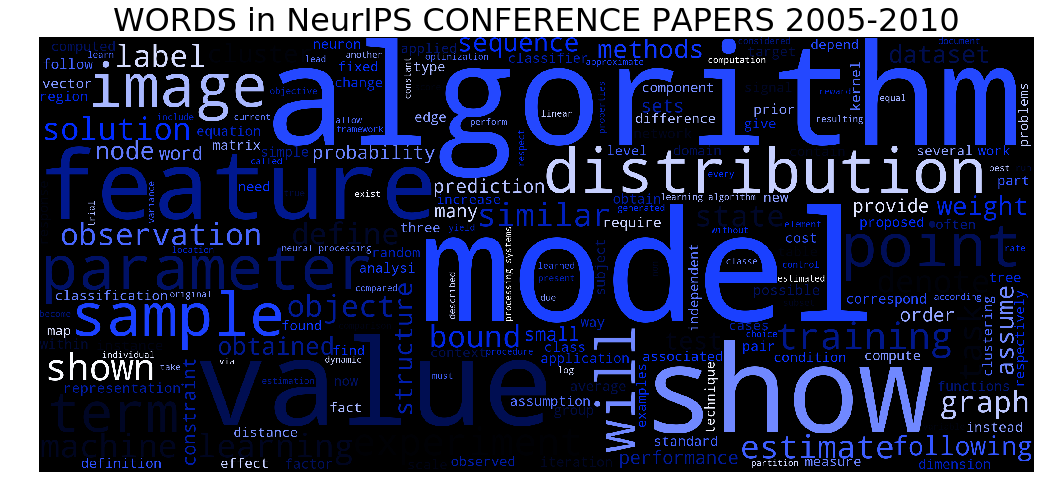

In [126]:
# Wordcloud thru 2010
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_10)

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 2005-2010", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_2010');

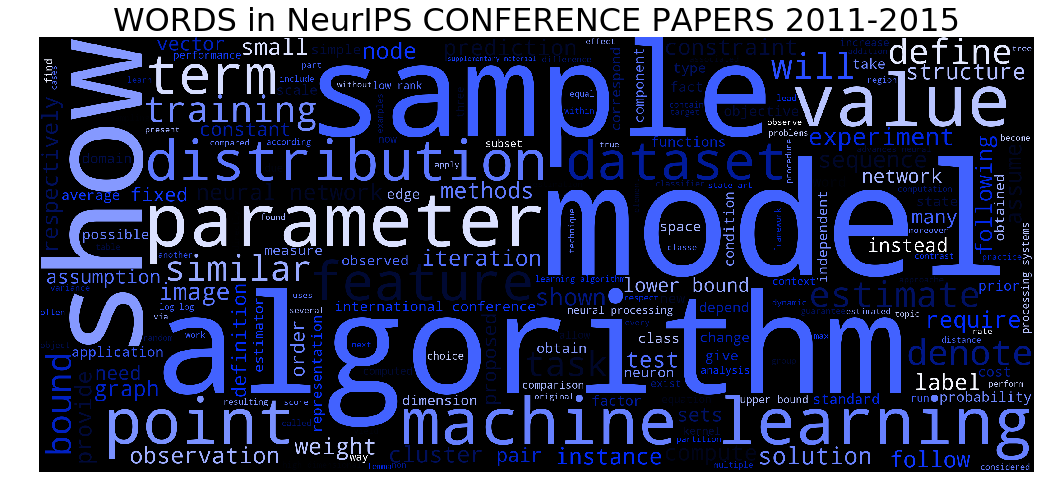

In [130]:
# Wordcloud thru 2015
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_15)

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 2011-2015", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_2015');

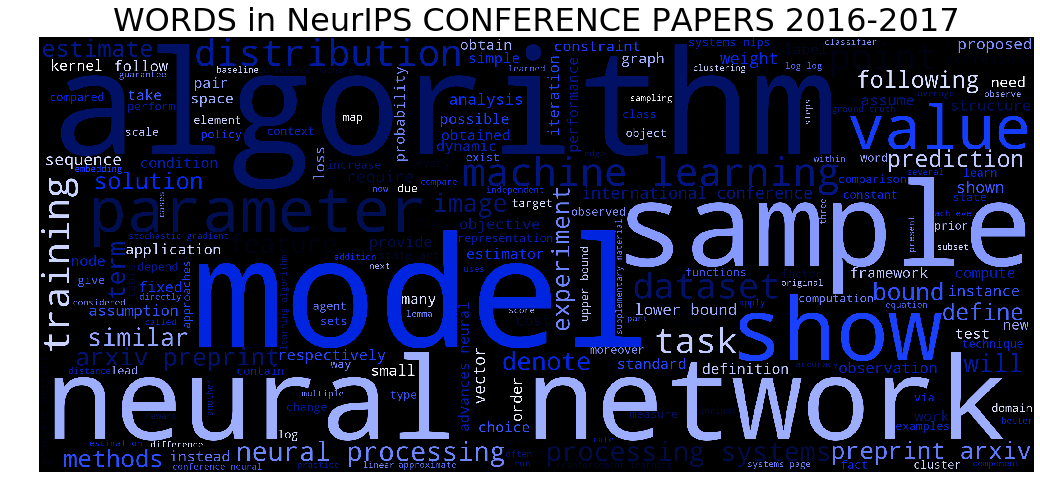

In [131]:
# Wordcloud thru 2017
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=3200,
                      height=1400
                     ).generate(completestring_17)

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

plt.figure( figsize =(25,8))
plt.title("WORDS in NeurIPS CONFERENCE PAPERS 2016-2017", fontsize=32)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_thru_2017');